<a href="https://colab.research.google.com/github/Asad-Khan9/Exploratory-Data-Analysis-/blob/main/eda_assignment_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mohammad Asad Khan
# 21BDS0334

In [ ]:
import pandas as pd
df = pd.read_csv("EDA DATASET.csv")
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                338 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    object 
 5   Band Gap (eV)          338 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         338 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(5)
memory usage: 26.9+ KB


In [ ]:
df.shape

(339, 11)

In [ ]:
df.describe()

,Formation Energy (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume
count,339.000000,338.000000,339.000000,339.000000,339.000000
mean,-2.616950,2.082169,38.837758,2.984003,467.765619
std,0.183809,1.088661,23.133142,0.353968,292.674559
min,-2.985000,0.000000,10.000000,2.200000,122.581000
25%,-2.757500,1.266250,26.000000,2.760500,286.381500
50%,-2.605000,2.505500,31.000000,2.947000,358.537000
75%,-2.525500,2.968500,52.000000,3.106000,601.696500
max,-2.012000,3.823000,132.000000,4.201000,1518.850000


In [ ]:
df.columns

Index(['Materials Id', 'Formula', 'Spacegroup', 'Formation Energy (eV)',
       'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)',
       'Volume', 'Has Bandstructure', 'Crystal System'],
      dtype='object')

In [ ]:
# Module - 2 Implementation

# creating a new dataframe (derived_df) with new columns derived from the columns of the original dataframe (df)

derived_df = pd.DataFrame()
derived_df["id"] = df["Materials Id"]
derived_df.shape


(339, 1)

In [ ]:
derived_df["Energy_Efficieny"] = df["Formation Energy (eV)"] / df["Nsites"]
derived_df["Energy_Density"] = df["Formation Energy (eV)"] / df["Volume"]
derived_df["Specific Band Gap"] = df["Band Gap (eV)"] / df["Nsites"]
derived_df["Density-to-Volume Ratio"] = df["Density (gm/cc)"] / df["Volume"]
# derived_df["Hull Energy Ratio"] = df["E Above Hull (eV)"] / df["Formation Energy (eV)"]
derived_df.head()

,id,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
0,mp-849394,-0.168687,-0.015119,0.216375,0.016766
1,mp-783909,-0.084250,-0.007381,0.089969,0.008010
2,mp-761311,-0.099107,-0.009196,0.130464,0.009149
3,mp-761598,-0.073237,-0.006380,0.079342,0.006667
4,mp-767709,-0.076306,-0.006521,0.071611,0.007914


In [ ]:
merged_df = pd.merge(df,derived_df, left_on="Materials Id", right_on = "id", how = "inner")
merged_df = merged_df.drop(columns=['id']).rename(columns={'materials_id': 'id'})
merged_df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic,-0.168687,-0.015119,0.216375,0.016766
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic,-0.084250,-0.007381,0.089969,0.008010
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic,-0.099107,-0.009196,0.130464,0.009149
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic,-0.073237,-0.006380,0.079342,0.006667
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic,-0.076306,-0.006521,0.071611,0.007914


In [ ]:
merged_df.shape

(339, 15)

In [ ]:
merged_df.duplicated().sum() # there are 0 duplicated rows in this dataframe

0

In [ ]:
column_s_rows_duplicated = {}
columns_ = list(merged_df.columns)
for i in columns_:
    # column_s_rows_duplicated[i] = merged_df[merged_df[i].duplicated()].shape[0]
    key = i
    value = merged_df[i].duplicated().sum()
    column_s_rows_duplicated[key] = value

column_s_rows_duplicated

# this shows the number of duplicated values in each column of the dataframe

{'Materials Id': 0,
 'Formula': 224,
 'Spacegroup': 295,
 'Formation Energy (eV)': 88,
 'E Above Hull (eV)': 230,
 'Band Gap (eV)': 32,
 'Nsites': 290,
 'Density (gm/cc)': 39,
 'Volume': 0,
 'Has Bandstructure': 337,
 'Crystal System': 334,
 'Energy_Efficieny': 15,
 'Energy_Density': 0,
 'Specific Band Gap': 19,
 'Density-to-Volume Ratio': 0}

In [ ]:
# total number of null values in each columns
merged_df.isnull().sum()

,0
Materials Id,0
Formula,1
Spacegroup,0
Formation Energy (eV),0
E Above Hull (eV),0
Band Gap (eV),1
Nsites,0
Density (gm/cc),0
Volume,0
Has Bandstructure,0


In [ ]:
# total number of null values in the entire dataset
merged_df.isnull().sum().sum()

4

In [ ]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]
rows_with_nulls

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
24,mp-767303,Li2Mn(SiO3)2,C2,-2.778,0.085,3.169,22,2.920,251.377,True,NaN,-0.126273,-0.011051,0.144045,0.011616
79,mp-765416,NaN,C2,-2.955,0.063,3.031,31,2.711,400.680,True,monoclinic,-0.095323,-0.007375,0.097774,0.006766
80,mp-762723,Li3Fe2(SiO4)2,P21,-2.561,0.063,NaN,30,2.943,357.383,False,monoclinic,-0.085367,-0.007166,NaN,0.008235


In [ ]:
# merged_df.isnull()

In [ ]:
# merged_df["Crystal System"].iloc[20:30]
columns_with_question_mark = []

# Iterate through all columns in the DataFrame
for col in merged_df.columns:
    # Check if the column contains any "?"
    if merged_df[col].isin(["?"]).any():
        columns_with_question_mark.append(col)

print("Columns with '?':", columns_with_question_mark)

Columns with '?': ['E Above Hull (eV)', 'Crystal System']


In [ ]:
# Get the indices of rows where any column contains "?"
indices_with_question_mark = merged_df[merged_df.isin(["?"]).any(axis=1)].index
merged_df.iloc[indices_with_question_mark]

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
88,mp-762562,Li2Fe(Si2O5)2,P21/m,-2.898,?,3.171,68,2.518,902.44,True,monoclinic,-0.042618,-0.003211,0.046632,0.002790
89,mp-761782,Li7Fe3(SiO6)2,C2/m,-2.409,0.078,1.658,24,3.692,208.83,True,?,-0.100375,-0.011536,0.069083,0.017679


In [ ]:
# therefore, it is noticed that the dataset contains null values in 2 forms;
# NaN values and "?" values.
# since, the dataset is small, and the null values are very few, it is best to
# deal with null values by filling them instead of dropping them.

In [ ]:
# filling NaN values

merged_df.iloc[15:35]

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System,Energy_Efficieny,Energy_Density,Specific Band Gap,Density-to-Volume Ratio
15,mp-868532,Li5Mn(SiO4)2,C2,-2.649,0.067,0.584,16,2.588,175.701,False,monoclinic,-0.165563,-0.015077,0.036500,0.014730
16,mp-850142,Li2Mn(Si2O5)2,P21/c,-2.942,0.069,3.823,68,2.310,980.879,False,monoclinic,-0.043265,-0.002999,0.056221,0.002355
17,mp-767853,Li2Mn2Si3O10,Cc,-2.712,0.073,1.262,34,2.847,429.302,True,monoclinic,-0.079765,-0.006317,0.037118,0.006632
18,mp-849428,Li2Mn2(SiO3)3,P21/c,-2.769,0.077,3.188,64,2.517,929.064,False,monoclinic,-0.043266,-0.002980,0.049813,0.002709
19,mp-761329,LiMn(SiO3)2,C2/c,-2.782,0.078,1.497,20,3.104,228.983,True,monoclinic,-0.139100,-0.012149,0.074850,0.013556
20,mp-761653,Li2MnSi3O8,P21,-2.871,0.082,2.736,28,2.672,349.386,True,monoclinic,-0.102536,-0.008217,0.097714,0.007648
21,mp-769543,Li3Mn2(SiO4)2,P21,-2.612,0.083,0.000,30,2.887,362.254,True,monoclinic,-0.087067,-0.007210,0.000000,0.007970
22,mp-849217,Li4Mn(SiO3)3,C2,-2.794,0.083,2.862,34,2.649,389.814,True,monoclinic,-0.082176,-0.007168,0.084176,0.006796
23,mp-767695,Li2MnSi3O8,P21,-2.868,0.085,3.261,28,2.628,355.180,True,monoclinic,-0.102429,-0.008075,0.116464,0.007399
24,mp-767303,Li2Mn(SiO3)2,C2,-2.778,0.085,3.169,22,2.920,251.377,True,NaN,-0.126273,-0.011051,0.144045,0.011616


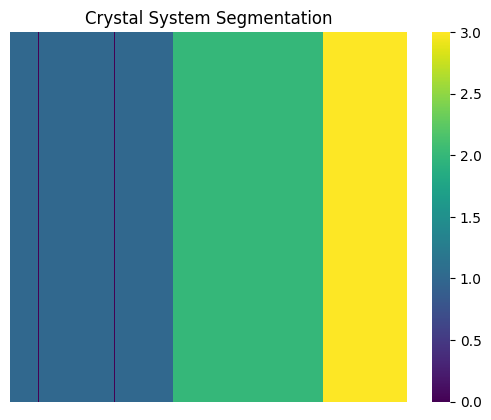

In [ ]:
import numpy as np
import seaborn as sns

# Map Crystal System to numerical values for heatmap
system_map = {"monoclinic": 1, "orthorhombic": 2, "triclinic": 3, "NaN": 0, "?": 0}
mapped_values = merged_df["Crystal System"].map(system_map).fillna(0)

sns.heatmap(
    np.array([mapped_values]),
    cmap="viridis",
    cbar=True,
    xticklabels=False,
    yticklabels=False
)
plt.title("Crystal System Segmentation")
plt.show()


In [ ]:
merged_df["E Above Hull (eV)"].nunique()

109